# Лабораторна робота No5. Семантична сегментацiя

1. Обрати фреймворк для виконання роботи: tensorflow (тiльки 2-ї версiї) чи pytorch.

In [1]:
import tensorflow as tf

from lib.model.u_net import create_u_net

from src.data.brain_tumor_segmentation import create_brain_tumor_segmentation_ds
from src.visualization.image import sample_image_and_mask
from src.visualization.plot import plot_loss_and_val_accuracy, plot_loss_and_val_loss

2. Обрати будь-який датасет зображень (або його частину) для вирiшення задачi семантичної сегментацiї

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


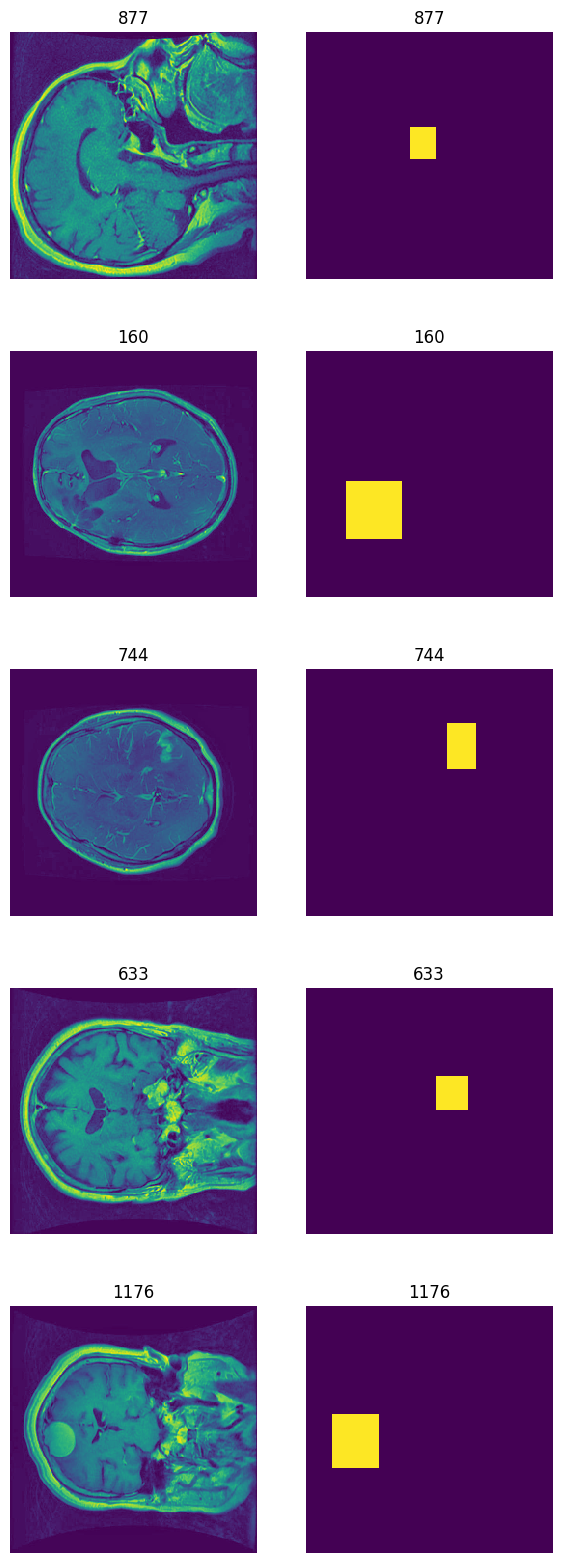

In [2]:
(train_x, train_y), (valid_x, valid_y), (test_x, test_y)  = create_brain_tumor_segmentation_ds()

shape = test_x.shape[1:]

sample_image_and_mask(train_x, train_y, 5)

3. Реалiзувати модель власноруч. В якостi моделi можна використовувати U-Net

In [3]:
model = create_u_net(shape)

model.summary()

opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)

model.compile(
    loss="binary_crossentropy",
    optimizer=opt,
    metrics=["accuracy"],
)

2024-11-13 01:38:59.322215: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-11-13 01:38:59.322233: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2024-11-13 01:38:59.322236: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2024-11-13 01:38:59.322261: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-13 01:38:59.322273: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

4. Навчити обрану модель на датасетi.

In [4]:
train_feedback = model.fit(
    train_x,
    train_y,
    epochs=10,
    validation_data=(valid_x, valid_y),
)

Epoch 1/10


2024-11-13 01:39:00.466360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 64s 1s/step - loss: 0.2208 - accuracy: 0.9633 - val_loss: 0.1359 - val_accuracy: 0.9633
Epoch 2/10
47/47 [==============================] - 62s 1s/step - loss: 0.1344 - accuracy: 0.9635 - val_loss: 0.1321 - val_accuracy: 0.9633
Epoch 3/10
47/47 [==============================] - 64s 1s/step - loss: 0.1238 - accuracy: 0.9635 - val_loss: 0.1195 - val_accuracy: 0.9633
Epoch 4/10
47/47 [==============================] - 70s 2s/step - loss: 0.1128 - accuracy: 0.9635 - val_loss: 0.1218 - val_accuracy: 0.9633
Epoch 5/10
47/47 [==============================] - 69s 1s/step - loss: 0.1103 - accuracy: 0.9635 - val_loss: 0.1128 - val_accuracy: 0.9633
Epoch 6/10
47/47 [==============================] - 66s 1s/step - loss: 0.1058 - accuracy: 0.9635 - val_loss: 0.1066 - val_accuracy: 0.9634
Epoch 7/10
47/47 [==============================] - 70s 1s/step - loss: 0.1007 - accuracy: 0.9649 - val_loss: 0.1025 - val_accuracy: 0.9661
Epoch 8/10
47/47 [=============

In [5]:
score = model.evaluate(test_x, test_y, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08465267717838287
Test accuracy: 0.9679419994354248


5. Проаналiзувати графiки навчання, точностi.

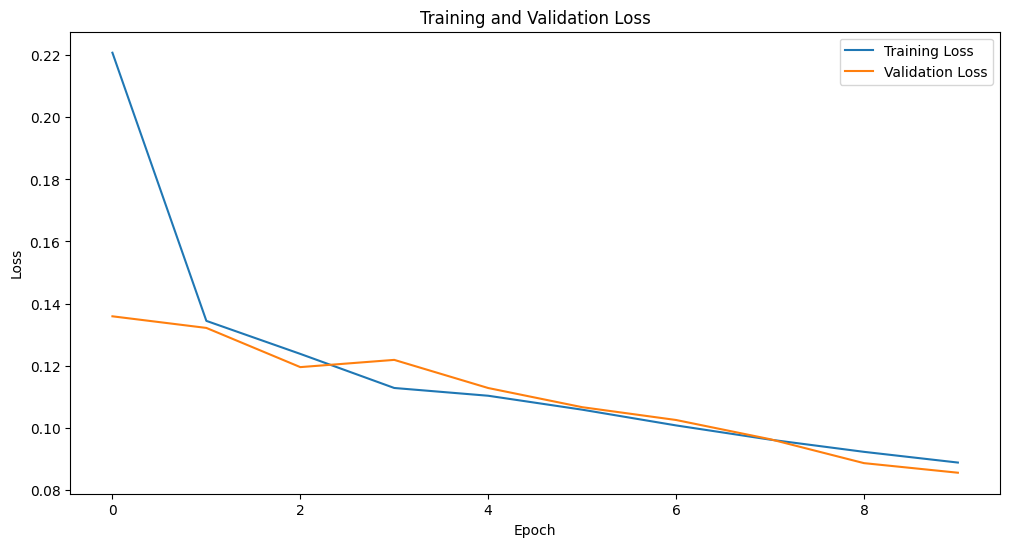

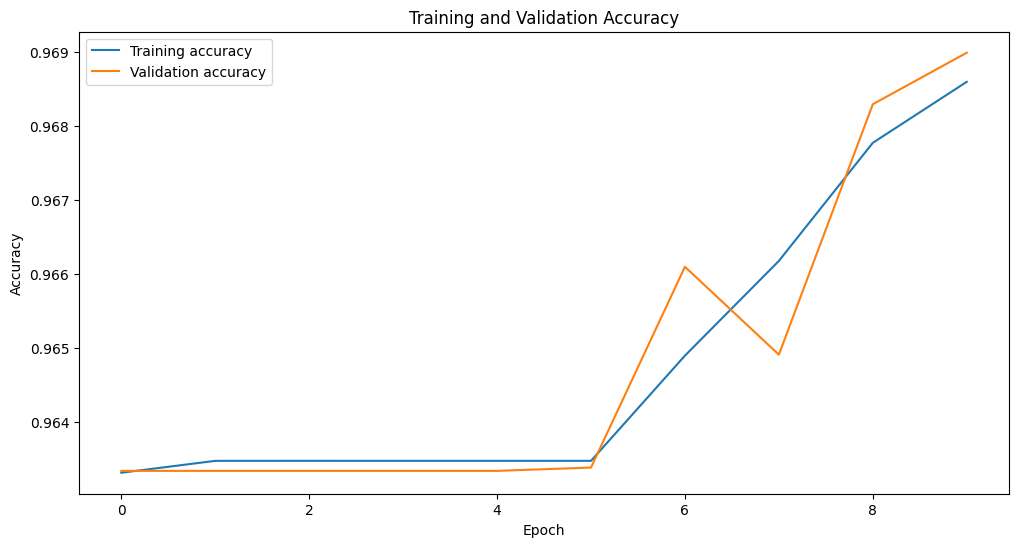

In [6]:
plot_loss_and_val_loss(train_feedback)
plot_loss_and_val_accuracy(train_feedback)

6. Вiзуалiзувати вихiд моделi на зображеннях з тестової вибiрки.

In [11]:
test_y_hat = model.predict(test_x)

7/7 [==============================] - 2s 348ms/step


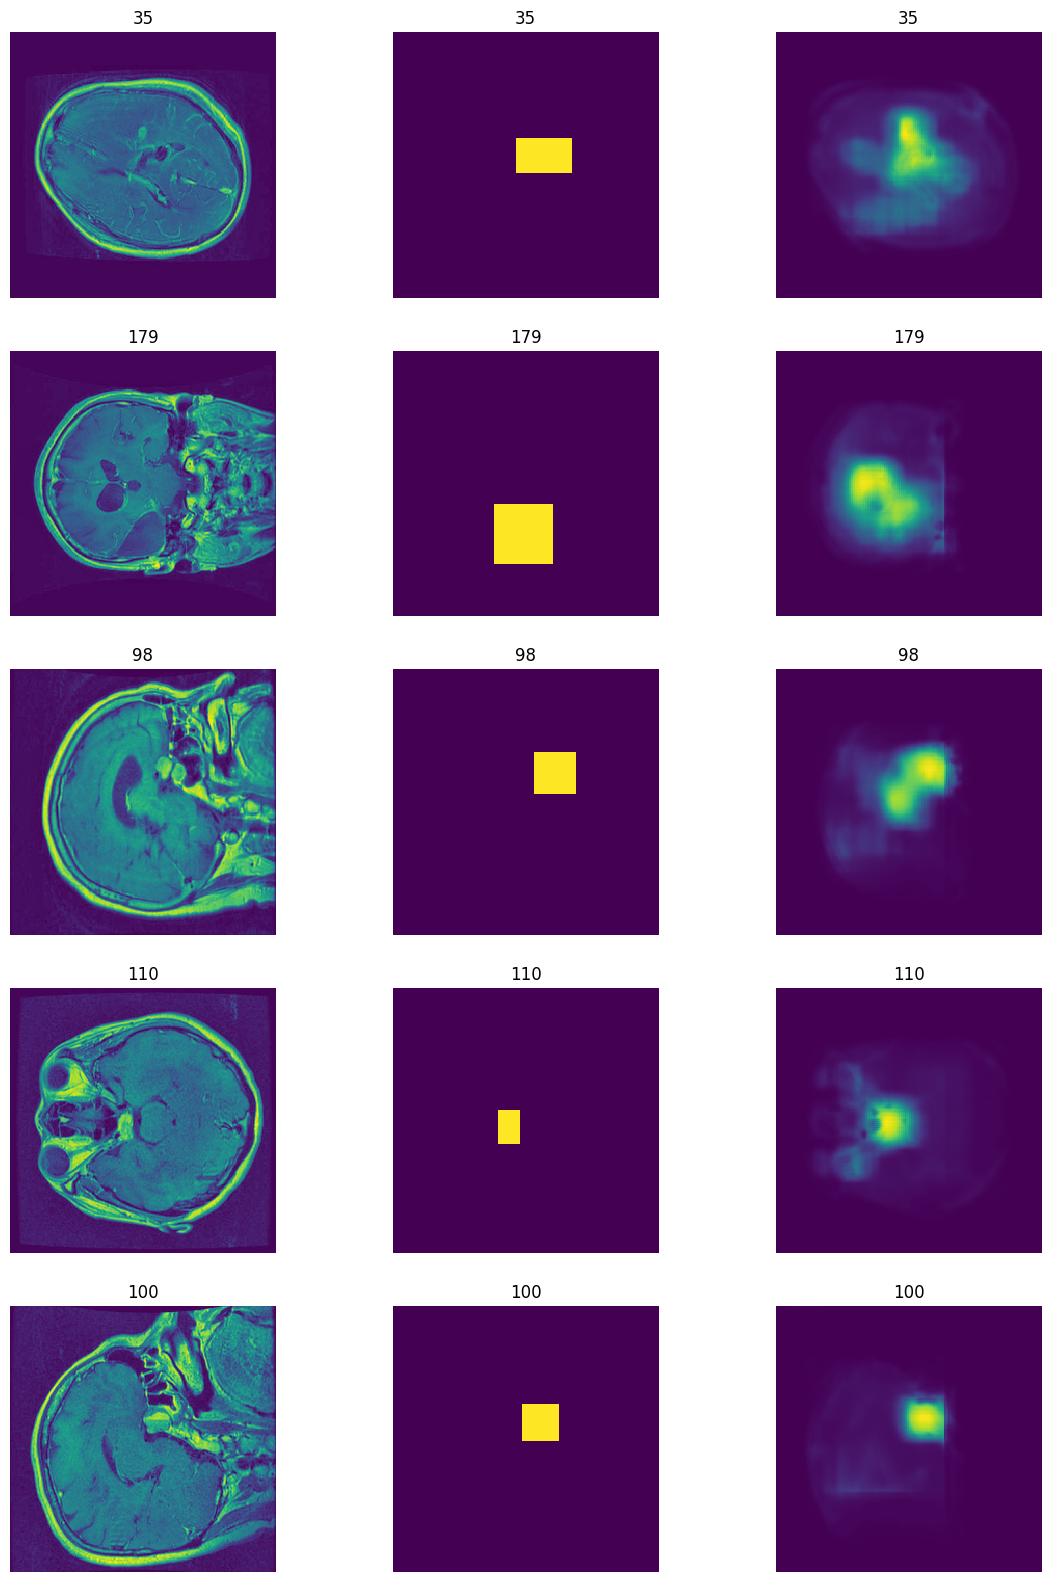

In [19]:
sample_image_and_mask(x=test_x, y=test_y, y_hat=test_y_hat, count=5)